# COGNIFYZ INTERNSHIP PROGRAM LEVEL 1
### DATA ANALYSIS WITH PYTHON

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mitosheet

In [3]:
# load dataset
df = pd.read_csv("Dataset.csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [4]:
# We look out for some information about the dataset to help us strategize the data cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
# Size of the Dataset
df.shape

(9551, 21)

It can be observed that the Cuisines column is having some missing values so we will start the cleaning process by removing empty rows.

In [6]:
# Drop Null
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

Now that the null entries have been removed successfully, we will start with our first task.

### LEVEL 1
#### Task 1: Top Cuisine
##### a. Determine the top three most common cuisines in the dataset.

In [7]:
# we want to find out the type of cuisines we have
df["Cuisines"]

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

It can be observed that we have multiple cuisines in some rows. We will now split them so we can be able to identify which specific cuisines fall within the top 3 cuisines.

Top 3 cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


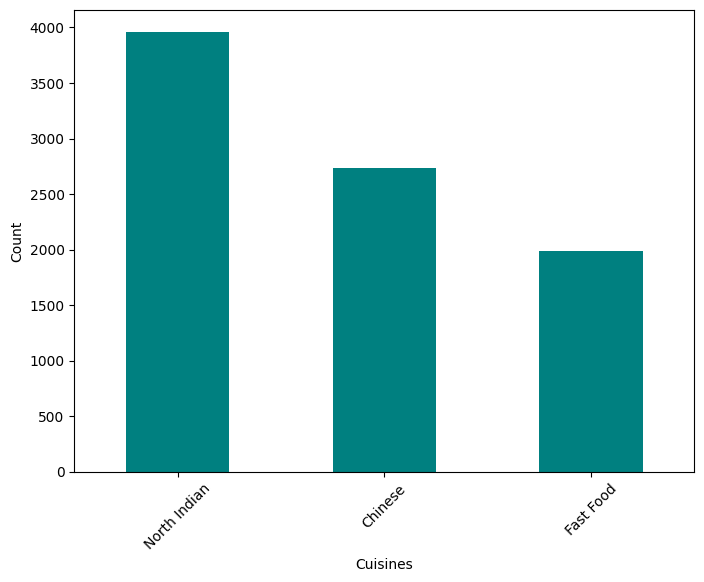

In [8]:
# splitting the cuisine column into different columns
all_cuisines = []

# for loop to aid in the splitting
for cuisines in df["Cuisines"]:
    all_cuisines.extend(cuisines.split(", "))
    
# Now we count the occurence of each cuisine
cuisine_count = pd.Series(all_cuisines).value_counts()

# Get the top 3 cuisines
top_3_cuisines = cuisine_count.head(3)

# Display the top 3 cuisines
print("Top 3 cuisines:")
print(top_3_cuisines)

# Visualize this information
plt.figure(figsize=(8,6))
top_3_cuisines.plot(kind='bar', color = 'teal')
plt.xlabel("Cuisines")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Therefore the top 3 common cuisines in the dataset is North Indian (3960), Chinese (2735) and Fast Food (1986).

##### b. Calculate the percentage of restaurants that serve each of the top cuisines.

Percentage of restaurants that serve each of the top cuisines:
North Indian     41.5%
Chinese         28.66%
Fast Food       20.81%
Name: count, dtype: object


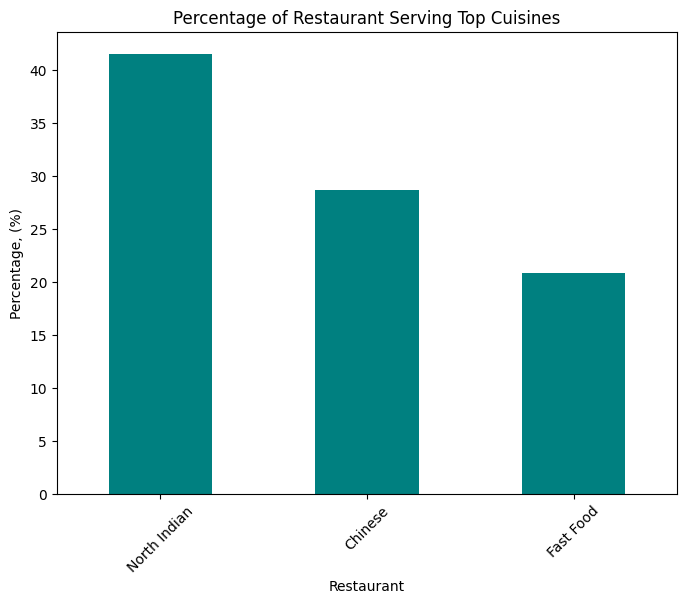

In [9]:
# Calculate the percentage of restaurants that serve each of the top cuisines
total_restaurants = len(df)
percentage_per_cuisine = ((top_3_cuisines / total_restaurants) * 100).round(2)

# Display the percentage per cuisine
print("Percentage of restaurants that serve each of the top cuisines:")
print(percentage_per_cuisine.astype('str')+"%")

# Visualize this information
plt.figure(figsize=(8,6))
percentage_per_cuisine.plot(kind='bar', color='teal')
plt.title("Percentage of Restaurant Serving Top Cuisines")
plt.xlabel("Restaurant")
plt.ylabel("Percentage, (%)")
plt.xticks(rotation=45)
plt.show()

Therefore the percentage of restaurants that serve North Indian = 42.5%, Chinese = 28.66% and Fast Food = 20.81%

#### Task 2: City Analysis
##### a. Identify the city with the highest number of restaurants in the dataset.

City with the highest number of restaurants: New Delhi


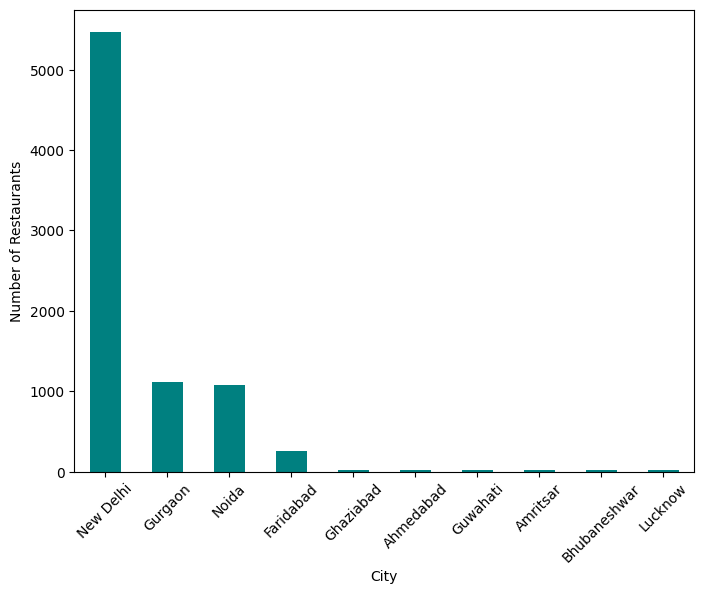

In [10]:
restaurant_count_per_city = df["City"].value_counts()

# Get the city with the highest number of restaurants
city_with_highest_restaurants = restaurant_count_per_city.idxmax()

# Display the city with the highest number of restaurants
print("City with the highest number of restaurants:", city_with_highest_restaurants)

# Visualize this information
plt.figure(figsize=(8,6))
restaurant_count_per_city.head(10).plot(kind='bar', color='teal')
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

##### b. Calculate the average rating for restaurants in each city.

In [11]:
# Average rating for restaurants in each city
average_rating = df.groupby('City')['Aggregate rating'].mean()
print("Average rating for restaurants in each city:")
print(average_rating.round(2))

Average rating for restaurants in each city:
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.55
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 140, dtype: float64


##### c. Determine the city with the highest average rating.

In [12]:
highest_average_rating_city = average_rating.idxmax()
print("The city with the highest average rating is",highest_average_rating_city)

The city with the highest average rating is Inner City


#### Task 3: Price range distribution

##### a. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


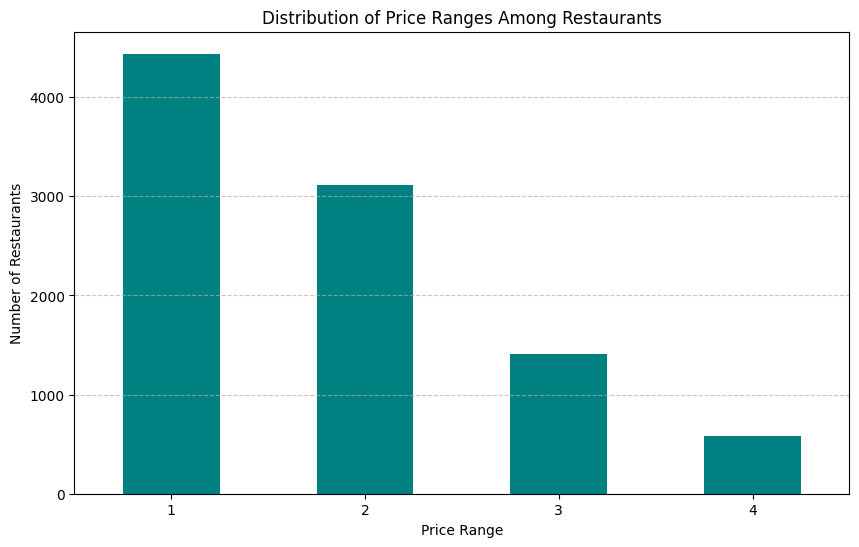

In [13]:
#  count the number of times each price range appear
price_range_dist = df['Price range'].value_counts()
print(price_range_dist)

# Plotting the bar chart
plt.figure(figsize=(10, 6)) 
price_range_dist.plot(kind='bar', color='teal') 
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

More restaurants fall under Price range 1 (4438), followed by 2 (3113), followed by 3 (1405) and 4 being the last with 586 restaurants.

##### b. Calculate the percentage of restaurants in each price range category.

Price range
1    46.51%
2    32.62%
3    14.72%
4     6.14%
Name: count, dtype: object


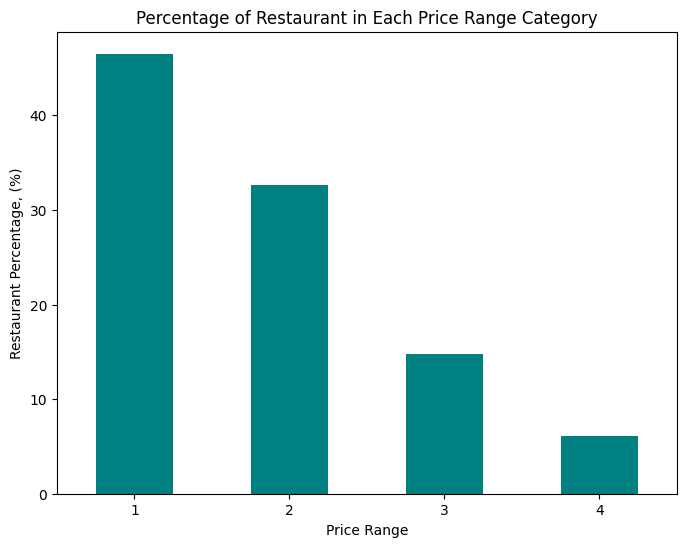

In [14]:
# percentage of restaurants in each price range category
percentage_restaurants_price_range = round(price_range_dist / total_restaurants * 100, 2)
print(percentage_restaurants_price_range.astype('str')+"%")

# Visualize this information
plt.figure(figsize=(8,6))
percentage_restaurants_price_range.plot(kind='bar', color='teal')
plt.title("Percentage of Restaurant in Each Price Range Category")
plt.xlabel("Price Range")
plt.ylabel("Restaurant Percentage, (%)")
plt.xticks(rotation=0)
plt.show()

Price range 1 has 46.51%, 2 has 32.62%, 3 has 14.72% and 4 has 6.14%

#### Task 4: Online Delivery
##### a. Determine the percentage of restaurants that offer online delivery.

In [15]:
# determine the number of restaurants for each of the delivery options
delivery = df['Has Online delivery'].value_counts()
delivery

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

The percentage of restaurants that offer online delivery is 25.69%


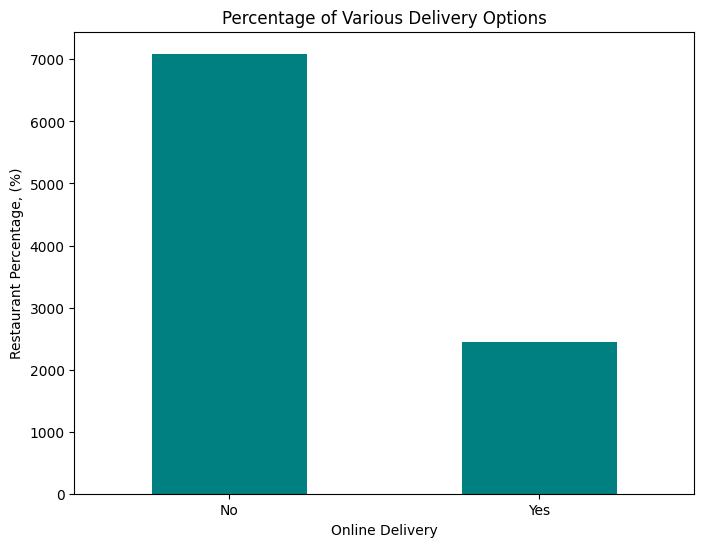

In [16]:
# calculate the percentage of restaurants that allow online delivery
percentage_online_delivery_restaurants = round(delivery[1] / total_restaurants * 100, 2)
print(f"The percentage of restaurants that offer online delivery is {percentage_online_delivery_restaurants}%")

# visualize this information
plt.figure(figsize=(8,6))
delivery.plot(kind='bar', color='teal')
plt.title("Percentage of Various Delivery Options")
plt.xlabel("Online Delivery")
plt.ylabel("Restaurant Percentage, (%)")
plt.xticks(rotation=0)
plt.show()

Therefore 25.69% of the restaurants offer online delivery.

##### b. Compare the average ratings of restaurants with and without online delivery.

In [17]:
# calculate the average ratings of restaurant
average_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean()
round(average_ratings, 2)

Has Online delivery
No     2.46
Yes    3.25
Name: Aggregate rating, dtype: float64

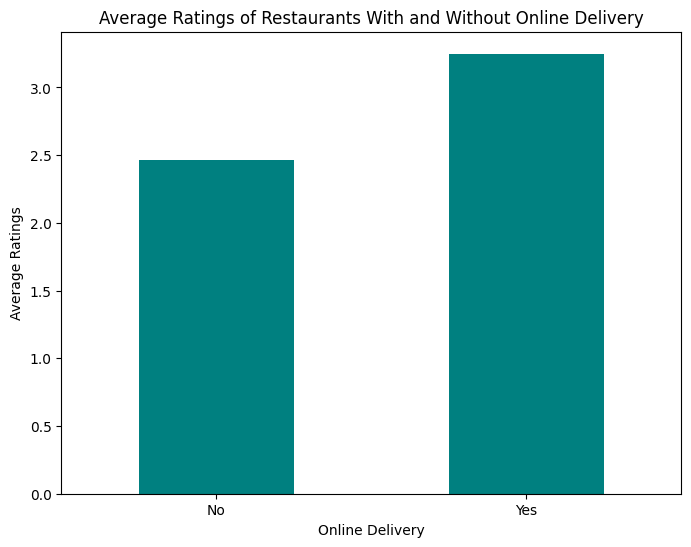

In [18]:
# visualize this information
plt.figure(figsize=(8,6))
average_ratings.plot(kind='bar', color = 'teal')
plt.title("Average Ratings of Restaurants With and Without Online Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Average Ratings")
plt.xticks(rotation=0)
plt.show()

It can be observed that restaurants that allow "Online Delivery" have better rating than those that do not allow.